# **c1) Tensorflow without auto differentiation**

In [ ]:
import tensorflow as tf
x_tf=tf.random.uniform(shape=(100,3),dtype='float32')
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3Z^2+1)
weights_true_tf=tf.transpose(tf.constant([[3,2,1],[1,2,3]],dtype='float32'))
bias_true_tf = tf.constant([-1,1],dtype='float32')
y_true_tf =  x_tf**2@weights_true_tf + bias_true_tf

In [ ]:
def relu(x):
  return tf.maximum(x, 0)

def relu_backward(input, output_gradient):
      input_gradient = tf.cast(tf.math.greater(input, 0),dtype='float32')* output_gradient
      return input_gradient

In [ ]:
def fit(x_tf,y_true_tf,num_epochs:int,lr:int):
  w1=tf.random.uniform(shape=(3,4),dtype='float32')
  b1=tf.zeros(4,dtype='float32')
  w2=tf.random.uniform(shape=(4,3),dtype='float32')
  b2=tf.zeros(3,dtype='float32')
  w3=tf.random.uniform(shape=(3,2),dtype='float32')
  b3=tf.zeros(2,dtype='float32')
  for epoch in range(num_epochs):
    z1=x_tf@w1+b1
    r1=relu(z1)
    z2=r1@w2+b2
    r2=relu(z2)
    z3=r2@w3+b3
    y_pred_tf=z3
    loss=tf.reduce_mean((y_pred_tf - y_true_tf) ** 2)
    n = y_true_tf.shape[0]
    loss_gradient=gradient = 2. * (y_pred_tf - y_true_tf) / n
    print(f'Epoch {epoch}, loss {loss}')
    weights_gradient3 = tf.transpose(r2) @ loss_gradient
    bias_gradient3 = tf.reduce_sum(loss_gradient,axis=0)
    l_gradient3 = loss_gradient @ tf.transpose(w3)
     
    r_gradient2=relu_backward(z2,l_gradient3)
     
    weights_gradient2 = tf.transpose(r1) @ r_gradient2
    bias_gradient2 = tf.reduce_sum(r_gradient2,axis=0)
    l_gradient2 = r_gradient2 @ tf.transpose(w2)
    
    r_gradient1=relu_backward(z1,l_gradient2)
    
    weights_gradient1 = tf.transpose(x_tf) @ r_gradient1
    bias_gradient1 = tf.reduce_sum(r_gradient1,axis=0)
    l_gradient1 = r_gradient1 @ tf.transpose(w1)
    
    
    w1 = w1 - lr * weights_gradient1
    b1 = b1 - lr * bias_gradient1
    w2 = w2 - lr * weights_gradient2
    b2 = b2 - lr * bias_gradient2
    w3 = w3 - lr * weights_gradient3
    b3 = b3 - lr * bias_gradient3

  return y_pred_tf



In [ ]:
 y_pred_tf=fit(x_tf,y_true_tf,30,0.01)

Epoch 0, loss 1.6124305725097656
Epoch 1, loss 1.2383790016174316
Epoch 2, loss 0.9802513122558594
Epoch 3, loss 0.8042463660240173
Epoch 4, loss 0.6857897043228149
Epoch 5, loss 0.60670006275177
Epoch 6, loss 0.5539803504943848
Epoch 7, loss 0.5186785459518433
Epoch 8, loss 0.49479353427886963
Epoch 9, loss 0.47836601734161377
Epoch 10, loss 0.46680548787117004
Epoch 11, loss 0.45842379331588745
Epoch 12, loss 0.4521220922470093
Epoch 13, loss 0.44718512892723083
Epoch 14, loss 0.443147748708725
Epoch 15, loss 0.4397068917751312
Epoch 16, loss 0.43666502833366394
Epoch 17, loss 0.43389371037483215
Epoch 18, loss 0.431308776140213
Epoch 19, loss 0.4288555383682251
Epoch 20, loss 0.42649802565574646
Epoch 21, loss 0.42421281337738037
Epoch 22, loss 0.42198431491851807
Epoch 23, loss 0.41980239748954773
Epoch 24, loss 0.4176602065563202
Epoch 25, loss 0.41555312275886536
Epoch 26, loss 0.41347813606262207
Epoch 27, loss 0.4114329516887665
Epoch 28, loss 0.4094161093235016
Epoch 29, loss 

In [ ]:
from sklearn.manifold import TSNE 
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

(100, 2) (100, 1) (100, 1)


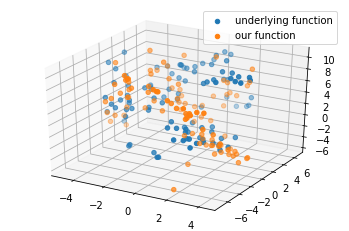

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_tf), TSNE(n_components=1).fit_transform(y_true_tf), TSNE(n_components=1).fit_transform(y_pred_tf))

# **c2) Tensorflow with auto differentiation**

In [ ]:
import tensorflow as tf
x_tf2=tf.random.uniform(shape=(50,3),dtype='float32')
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3Z^2+1)
weights_true_tf2=tf.transpose(tf.constant([[3,2,1],[1,2,3]],dtype='float32'))
bias_true_tf2 = tf.Variable([-1,1],dtype='float32')
y_true_tf2 =  x_tf2**2@weights_true_tf2 + bias_true_tf2

In [ ]:
def relu(x):
  return tf.maximum(x, 0)

def relu_backward(input, output_gradient):
      with tf.GradientTape() as t:
        t.watch(input)
        y=tf.maximum(input,0)
      g=t.gradient(y,input)
      #input_gradient = tf.cast(tf.math.greater(input, 0),dtype='float32')* output_gradient
      return g*output_gradient


def loss(real_y, pred_y):
    return tf.reduce_mean((y_pred_tf - y_true_tf) ** 2)

In [ ]:
def fit(x_tf,y_true_tf,num_epochs:int,lr:int):
  w1=tf.random.uniform(shape=(3,4),dtype='float32')
  b1=tf.zeros(4,dtype='float32')
  w2=tf.random.uniform(shape=(4,3),dtype='float32')
  b2=tf.zeros(3,dtype='float32')
  w3=tf.random.uniform(shape=(3,2),dtype='float32')
  b3=tf.zeros(2,dtype='float32')
  for epoch in range(num_epochs):
    z1=x_tf@w1+b1
    r1=relu(z1)
    z2=r1@w2+b2
    r2=relu(z2)
    z3=r2@w3+b3
    y_pred_tf=z3
    
    n = y_true_tf.shape[0]
    #loss_gradient=gradient = 2. * (y_pred_tf - y_true_tf) / n
    with tf.GradientTape() as tl:
      tl.watch(y_pred_tf)
      tl.watch(y_true_tf2)
      loss=tf.reduce_mean((y_pred_tf - y_true_tf) ** 2)
      

    loss_gradient=tl.gradient(loss,y_pred_tf) 
    print(f'Epoch {epoch}, loss {loss}')
    with tf.GradientTape() as t3:
      t3.watch(w3)
      t3.watch(b3)
      z3=r2@w3+b3
    
    w3_gradient,b3_gradient=t3.gradient(z3,(w3,b3))
    #print("3rd gradient",w3_gradient,b3_gradient)
    l3_gradient=loss_gradient @ tf.transpose(w3)
    #weights_gradient3 = tf.transpose(r2) @ loss_gradient
    #bias_gradient3 = tf.reduce_sum(loss_gradient,axis=0)
    #l_gradient3 = loss_gradient @ tf.transpose(w3)
     
    r_gradient2=relu_backward(z2,l3_gradient)

    with tf.GradientTape() as t2:
      t2.watch(w2)
      t2.watch(b2)
      z2=r1@w2+b2

    w2_gradient,b2_gradient=t2.gradient(z2,(w2,b2))
    l2_gradient=r_gradient2@tf.transpose(w2)
    #print("2nd gradient",w2_gradient,b2_gradient)
    #weights_gradient2 = tf.transpose(r1) @ r_gradient2
    #bias_gradient2 = tf.reduce_sum(r_gradient2,axis=0)
    #l_gradient2 = r_gradient2 @ tf.transpose(w2)
    
    r_gradient1=relu_backward(z1,l2_gradient)

    with tf.GradientTape() as t1:
      t1.watch(w1)
      t1.watch(b1)
      z1=x_tf@w1+b1

    w1_gradient,b1_gradient=t1.gradient(z1,(w1,b1))
    l1_gradient=r_gradient1@tf.transpose(w1)
    #print("1st gradient",w1_gradient,b1_gradient)
    #weights_gradient1 = tf.transpose(x_tf) @ r_gradient1
    #bias_gradient1 = tf.reduce_sum(r_gradient1,axis=0)
    #l_gradient1 = r_gradient1 @ tf.transpose(w1)

    w1 = w1 - lr * w1_gradient
    b1 = b1 - lr * b1_gradient
    w2 = w2 - lr * w2_gradient
    b2 = b2 - lr * b2_gradient
    w3 = w3 - lr * w3_gradient
    b3 = b3 - lr * b3_gradient
    print(y_pred_tf)
  return y_pred_tf
    



In [ ]:
 t=fit(x_tf2,y_true_tf2,15,0.0001)

Epoch 0, loss 1.133713960647583
Epoch 1, loss 0.9703967571258545
Epoch 2, loss 0.8351582884788513
Epoch 3, loss 0.7258219718933105
Epoch 4, loss 0.640360951423645
Epoch 5, loss 0.5768881440162659
Epoch 6, loss 0.5336474776268005
Epoch 7, loss 0.5090058445930481
Epoch 8, loss 0.5014451742172241
Epoch 9, loss 0.5095553398132324
Epoch 10, loss 0.5320272445678711
Epoch 11, loss 0.5676463842391968
Epoch 12, loss 0.6152867674827576
Epoch 13, loss 0.6739052534103394
Epoch 14, loss 0.7425360679626465


In [ ]:
from sklearn.manifold import TSNE 
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [ ]:
print(tf.shape(TSNE(n_components=2).fit_transform(x_tf2)))
print(tf.shape(TSNE(n_components=1).fit_transform(y_true_tf2)))
print(tf.shape(TSNE(n_components=1).fit_transform(t)))

tf.Tensor([50  2], shape=(2,), dtype=int32)
tf.Tensor([50  1], shape=(2,), dtype=int32)
tf.Tensor([50  1], shape=(2,), dtype=int32)


(50, 2) (50, 1) (50, 1)


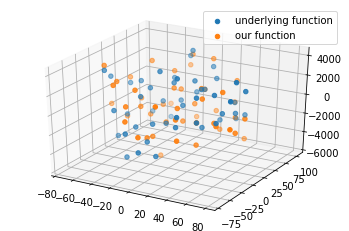

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_tf2), TSNE(n_components=1).fit_transform(y_true_tf2), TSNE(n_components=1).fit_transform(t))

# **c3) Keras model with subclassing**

In [ ]:
import tensorflow as tf
x_tf3=tf.random.uniform(shape=(500,3),dtype='float32')
#f(x,y,z)=(3x^2+2y^2+z^2-1,x^2+2y^2+3Z^2+1)
weights_true_tf3=tf.transpose(tf.constant([[3,2,1],[1,2,3]],dtype='float32'))
bias_true_tf3 = tf.Variable([-1,1],dtype='float32')
y_true_tf3 =  x_tf3**2@weights_true_tf3 + bias_true_tf3

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Softmax, concatenate, Dropout

class ModelSubClassing(Model):
    def __init__(self):
        super(ModelSubClassing,self).__init__()
        # define all layers in init
        # Layer of Block 1
        self.l1 = tf.keras.layers.Dense(3, activation='relu', name='dense_1')
        # Layer of Block 2
        self.l2  = tf.keras.layers.Dense(4, name='dense_2')
        self.l3  = tf.keras.layers.Dense(2, activation='relu', name='dense_3')
        self.softmax=Softmax()



    def call(self, input_tensor, training=True):
        # forward pass: block 1 
        x = self.l1(input_tensor)
        # forward pass: block 2 
        x = self.l2(x)

        return self.l3(x)

In [ ]:
model=ModelSubClassing()
y_pred_tf3=model(x_tf3)
print(tf.shape(y_pred_tf3))
print(tf.shape(y_true_tf3))
loss=tf.reduce_mean((y_pred_tf3 - y_true_tf3) ** 2)
loss.numpy()

tf.Tensor([500   2], shape=(2,), dtype=int32)
tf.Tensor([500   2], shape=(2,), dtype=int32)


6.1065607

In [ ]:
sub_classing_model = ModelSubClassing()
sub_classing_model.compile(
          loss      = tf.keras.losses.CategoricalCrossentropy(),
          optimizer = tf.keras.optimizers.Adam())
# fit 
sub_classing_model.fit(x_tf3, y_true_tf3, batch_size=128, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 3.5519
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 3.3971
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 3.4077
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 3.0820
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 3.0707


In [ ]:
y_pred3=sub_classing_model.predict(x_tf3)

In [ ]:
from sklearn.manifold import TSNE 
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(x.shape,y.shape,y_pred.shape)
  ax.scatter(x[:, 0], x[:, 1], y , label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

(500, 2) (500, 1) (500, 1)


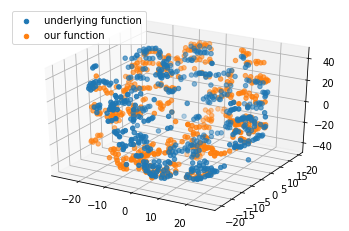

In [ ]:
plot_3d(TSNE(n_components=2).fit_transform(x_tf3), TSNE(n_components=1).fit_transform(y_true_tf3), TSNE(n_components=1).fit_transform(y_pred3))